# Annual Inflation-Adjusted Median Salaries

## Hypothesis

The object of this data analysis project is to determine whether race or sex can be a determining factor for the time periods we have available within data from the US Center of Bureau Labor Statistics (CBL).  My initial hypothesis is that the workers that are white and male will have distinctly higher average annual salaries than female or non-white workers.

### Content Setup

In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import re

In [2]:
# Get the data together from the csv
csvpath = os.path.join("ParseableData_Table-21.csv")
sex_type = ''
data = {
    'Year' : [],
    'Total' : [],
    'White' : [],
    'Black' : [],
    'Asian' : [],
    'Hispanic' : [],
    'Sex (M or F)' : []
}

with open(csvpath, newline='') as csvfile:
    csvread = csv.reader(csvfile, delimiter=',')
    
    for row in csvread:
        try:
            if row[0] in ['', 'Year']:
                next
            elif row[0] in ['Total', 'Women', 'Men']:
                sex_type = row[0]
            elif int(row[0]) in range(1979, 2020):
                data['Year'].append(int(row[0]))
                data['Total'].append(float(re.sub('[$,]', '', row[1])))
                data['White'].append(float(re.sub('[$,]', '', row[2])))
                data['Black'].append(float(re.sub('[$,]', '', row[3])))

                data['Asian'].append(float(re.sub('[$,]', '', row[4])) if "â€" not in row[4] else '\0')

                data['Hispanic'].append(float(re.sub('[$,]', '', row[5])))
                data['Sex (M or F)'].append(sex_type if sex_type in ['Women', 'Men'] else "Both")
        except ValueError:
            print(f"Skipping Row\n{row}\n")

Data_df = pd.DataFrame(data=data, columns=data.keys())

Skipping Row
['ï»¿"Table 21. Inflation-adjusted median hourly earnings', ' by race and Hispanic or Latino ethnicity', ' for wage and salary workers paid hourly rates', ' 1979-2018 annual averages"', '', '', '', '', '']

Skipping Row
['[In constant 2018 dollars]', '', '', '', '', '']

Skipping Row
['Note: The comparability of historical labor force data has been affected at various times by methodological and other changes in the Current Population Survey (CPS). Information about historical comparability is online at https://www.bls.gov/cps/documentation.htm#comp. As of 2003, estimates for the race groups shown (White, Black or African American, and Asian) include people who selected that race group only; people who selected more than one race group are not included. Prior to 2003, people who reported more than one race were included in the group they identified as the main race. Asian data for 2000-2002 are for Asians and Pacific Islanders. As of 2003, Asians constitute a separate cate

In [3]:
# Can't keep the non-numeric Asian data for proper analysis, so make two
# dataframes; one with and one without Asians
filtered_Asian_data = Data_df.loc[Data_df['Asian'] != '\0']
filtered_nonAsian_data = Data_df.drop(columns=['Asian'])

In [4]:
# Now get the differences that You'll use later
def add_diff_column(col_name, dataframe):
    try:
        print(f"Column {col_name} Already exists in DataFrame with {dataframe[col_name].count()} entries")
    except KeyError:
        name_filter = col_name.split(' ')
        dataframe.loc[:,  col_name] = dataframe.loc[:, name_filter[0]] - dataframe.loc[:, "Total"]

# Now tabulate the differences here
add_diff_column('Asian Diff', filtered_Asian_data)
add_diff_column('Black Diff', filtered_nonAsian_data)
add_diff_column('White Diff', filtered_nonAsian_data)
add_diff_column('Hispanic Diff', filtered_nonAsian_data)

C:\Users\jcjwg\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jcjwg\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
# A function for printing the specified columns of one or two given DataFrames
def print_and_save_lineplot(title, graph_dict, dataframe_1, dataframe_2):
    main_fig, main_plot = plt.subplots(sharex=True, sharey=True)
    main_plot.set_title(title)
    main_plot.set_xlabel('Year')
    main_plot.set_ylabel('Salary (USD / hour)')

    for trait in graph_dict:
        if graph_dict[trait] == 1:
            main_plot = plt.plot(
                [year for year in dataframe_1['Year']],
                [salary for salary in dataframe_1[trait]],
                marker='*',
                linewidth=0.8,
                markersize=10,
                label=trait
            )
        elif graph_dict[trait] == 2:
            main_plot = plt.plot(
                [year for year in dataframe_2['Year']],
                [salary for salary in dataframe_2[trait]],
                marker='*',
                linewidth=0.8,
                markersize=10,
                label=trait
            )
        else:
            main_plot = plt.plot(
                [year for year in dataframe_1['Year']],
                [salary for salary in dataframe_1[trait]],
                marker='*',
                linewidth=0.8,
                markersize=10,
                label='Male'
            )
            main_plot = plt.plot(
                [year for year in dataframe_2['Year']],
                [salary for salary in dataframe_2[trait]],
                marker='*',
                linewidth=0.8,
                markersize=10,
                label='Female'
            )
            
    plt.grid(True, which='both')
    plt.legend()
    plt.savefig(f'Save_Data/{title}.png')
    plt.show()
    plt.tight_layout()
Data_df

,Year,Total,White,Black,Asian,Hispanic,Sex (M or F)
0,1979,14.37,14.60,13.30, ,13.20,Both
1,1980,14.01,14.19,12.91, ,12.91,Both
2,1981,13.70,13.78,13.03, ,12.79,Both
3,1982,13.53,13.71,12.68, ,12.56,Both
4,1983,13.44,13.61,12.38, ,12.24,Both
...,...,...,...,...,...,...,...
115,2014,15.28,15.77,12.96,15.56,13.14,Men
116,2015,15.56,15.83,13.43,15.77,13.70,Men
117,2016,15.65,15.83,13.66,15.73,14.47,Men
118,2017,15.57,16.18,13.67,17.06,14.72,Men


### Brief Overview of the Data Sourced
The above table represents each median salary for each year's categories based on sex (male, female or both) and ethnicity (White, Asian, Hispanic and Black races).  The amounts are based on the value of the 2018 dollars and adjusted for inflation.

It is important to point out that the Asian racial category is not filled out for any year prior to 2000.  This is due to the CBL not accounting for Asian salaries until the year 2000.

In addition, since the average salaries are based off of the median and not the mean or mode, the salary averages presented here best reflect the average salary of each group.  This method of calculating the average keeps significant outliers from affecting the data, which the mean calculation would not be able to avoid.  The mode could be swayed by a large collection of workers making less or more than the average salary, while the median would skip over those groups if they weren't representative of the average salary.

## Racial Categories' Average Salaries for Each Year

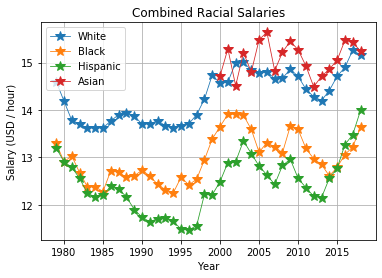

<Figure size 432x288 with 0 Axes>

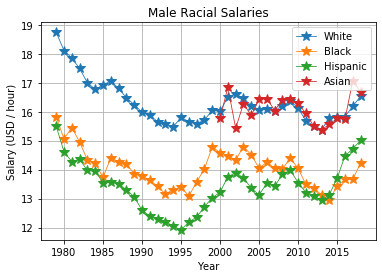

<Figure size 432x288 with 0 Axes>

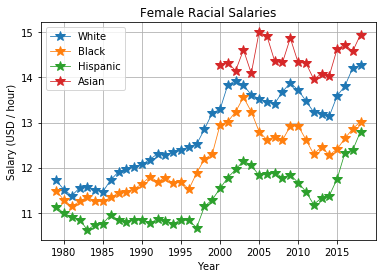

<Figure size 432x288 with 0 Axes>

In [6]:
# Filter for each sex-category's data before plotting them all separately
both_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Both']
both_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Both']
male_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Men']
male_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Men']
female_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Women']
female_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Women']

Race_Dict = {
    'White' : 1,
    'Black' : 1,
    'Hispanic' : 1,
    'Asian' : 2
}

print_and_save_lineplot('Combined Racial Salaries', Race_Dict, both_sexes, both_sexes_asian)
print_and_save_lineplot('Male Racial Salaries', Race_Dict, male_sexes, male_sexes_asian)
print_and_save_lineplot('Female Racial Salaries', Race_Dict, female_sexes, female_sexes_asian)

Each of the plots above are of the median salaries for each racial category within the three sex groups: male, female and both.


## How Each Race's Median Salary Differs from the Combined Median Salary

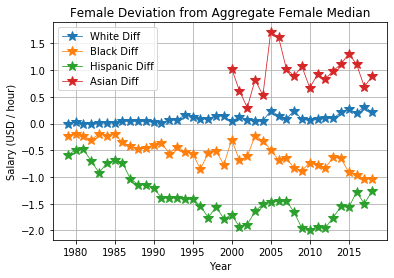

<Figure size 432x288 with 0 Axes>

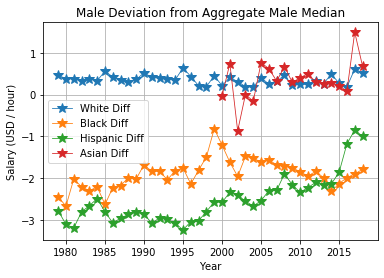

<Figure size 432x288 with 0 Axes>

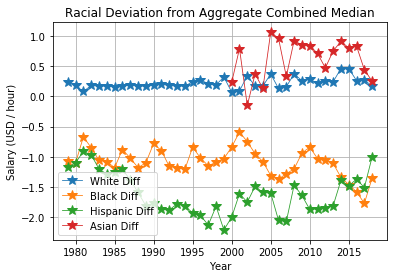

<Figure size 432x288 with 0 Axes>

In [7]:
diff_data = {
    'White Diff' : 1,
    'Black Diff' : 1,
    'Hispanic Diff' : 1,
    'Asian Diff' : 2
}

print_and_save_lineplot('Female Deviation from Aggregate Female Median', diff_data, female_sexes, female_sexes_asian)
print_and_save_lineplot('Male Deviation from Aggregate Male Median', diff_data, male_sexes, male_sexes_asian)
print_and_save_lineplot('Racial Deviation from Aggregate Combined Median', diff_data, both_sexes, both_sexes_asian)

The three plots above are of the differences between each racial group's median salary against the median salary of all racial groups combined.  It is interesting to note that all three charts show similar consistent patterns and traits; further implying that race does play into the median salary for each year between 1979 and 2018.

The white groups' salaries remained above $0.00/hr and below 50¢/hr above the yearly median in all three plots.  Considering how little deviation there is from the yearly median salary for each year in all three graphs, it seems likely that the median salary between all racial groups is fairly close to the median salary of the white group's.

Hispanic and Black groups', on the other hand, remain consistently beneath the total median salary across each of the sex groups.  Those racial groups' female categories in particular have largest negative differences from the total median with minimal differences 50¢/hr beneath the total median and surpassing $3.00 in difference on several occassions for Hispanic women.

Because the Asian demographics were not tabulated until 2000, we can only plot data from 2000 onward.  With a brief exception for salaries between 2000 and 2008, the data for Asian workers indicates a wide variance between -$1.00/hr and roughly $1.50/hr from the combined average.  After 2005, Asian workers in either sex category had annual average salaries at or above the combined racial average salary.

## The Average Salaries of Each Separate Sex category

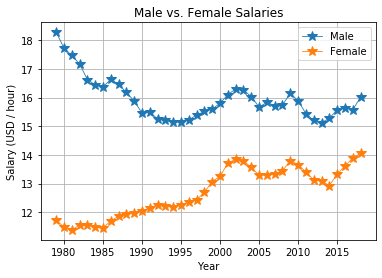

<Figure size 432x288 with 0 Axes>

In [8]:
sexes_dict = {'Total' : 3}

print_and_save_lineplot('Male vs. Female Salaries', sexes_dict, male_sexes, female_sexes)

The above plot is of the median salaries for men and women (across all races) against each other.  It is interesting to note that between 1995 and 2018 the two plots have a similar pattern to them.  This may reflect that both sex categories were impacted in a similar manner by external economic events.

Another noteworthy point the graph makes is that men have consistently higher median salaries than women over the entire timeline.  The only pattern in which the plots differ is in the time period before 1995, where it appears that men's salaries were on the decline while women's salaries were on the rise.

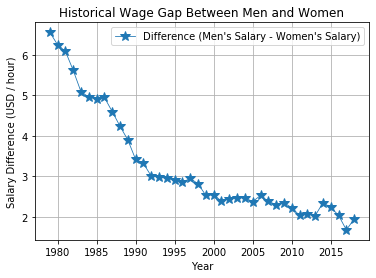

<Figure size 432x288 with 0 Axes>

In [9]:
# Calculate the Differences of Men and Women from Both
diff_m = [float(d) for d in male_sexes['Total']]
diff_f = [float(d) for d in female_sexes['Total']]
years = [int(year) for year in male_sexes['Year']]

diff = []
for i in range(0, len(diff_m)):
    diff.append(diff_m[i] - diff_f[i])

main_fig, main_plot = plt.subplots(sharex=True, sharey=True)
main_plot.set_title('Historical Wage Gap Between Men and Women')
main_plot.set_xlabel('Year')
main_plot.set_ylabel('Salary Difference (USD / hour)')
main_plot = plt.plot(years, diff, marker='*', linewidth=0.8, markersize=10, label='Difference (Men\'s Salary - Women\'s Salary)')
plt.grid(True, which='both')
plt.legend()
plt.savefig('Save_Data/The Wage Gap Between Men and Women.png')
plt.show()
plt.tight_layout()

The graph above charts the differences between the combined male and female salaries from 1979 to 2018.  The two largest stand-out patterrns are the steep drop in the differences bewteen 1979 and 1990 and the relatively slower drop from 1992 until 2018.  It should also be noted that all salary differences are greater than zero dollars, which means men have always earned more on average than women.  The largest difference in salary occurred in 1979 with a difference over $6.50/hr with the minimum in 2017 of a little over $1.60/hr.

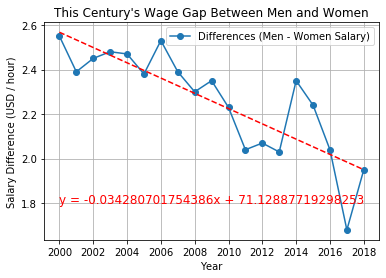

m: -0.034280701754386
yint: 71.12887719298253
r: -0.8304959173123905
p: 1.0741677788587162e-05
stderr: 0.005576506401113827


<Figure size 432x288 with 0 Axes>

In [10]:
# Also get the 'recent' data that we'll run stats on
years_cent = []
diff_cent = []
start_index = 0

for year in years:
    if year > 1999:
        years_cent.append(year)
    else:
        start_index += 1
for i in range(start_index, len(diff)):
    diff_cent.append(diff[i])

# Calculate the recent (2000's) stats and plot the linear regression line
slope, yint, rval, pval, stderr = st.linregress(years_cent, diff_cent)

lin_val = [float(i) * slope + yint for i in years_cent]

main_fig, main_plot = plt.subplots(sharex=True, sharey=True)
main_plot.set_title('This Century\'s Wage Gap Between Men and Women')
main_plot.set_xlabel('Year')
main_plot.set_ylabel('Salary Difference (USD / hour)')
main_plot = plt.plot(years_cent, diff_cent, marker='o', label='Differences (Men - Women Salary)')
main_plot = plt.plot(years_cent, lin_val, "r--")
main_plot = plt.annotate(
    f"y = {slope}x + {yint}",
    (2000, 1.8),
    fontsize = 12,
    color = 'red'
)
plt.xticks(np.arange(2000, 2020, 2))
plt.grid(True, which='both')
plt.legend()
plt.savefig('Save_Data/Century_Wage_Gap.png')
plt.show()
plt.tight_layout()

print(f"m: {slope}\nyint: {yint}\nr: {rval}\np: {pval}\nstderr: {stderr}")

The final chart represents this century's current trend in male vs. female salary differences.  The correlation coefficient (r-value) is roughly -0.830 while the probability of reproducing the results (p-value) is less than 0.0001.  This means that there is a large chance of a negative correlation between the differences between men's and women's average salary in a given year and that it is incredibly unlikely we'd be able to reproduce these results if we were to try and reproduce this data over a future time period.

This makes it seem likely that the next years' data can't be accurately predicted based on the data we do have, but that it is more likely that it will be smaller than the prior years.

The linear regression equation's slope seems to indicate that in an average year within this century, the gap between men's and women's salary is expected to shrink by about 3¢/hr.  It also makes the prediction that the difference in men's and women's salaries in year 0 would be roughly $71.12/hr; which is larger than any of the average salaries for any race or sex category by a factor of at least three.

## Conclusions

The data seems to support the hypothesis that men have a distinct salary advantage over women that remained persistent from 1979 through 2018.  The racial categories also suggest that while white workers did not always have the highest annual average salaries per worker, they consistently stayed above the median average salary and remained consistently higher than Hispanic and black workers.